In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2
from scipy.linalg import null_space

In [2]:
image1 = cv2.imread('A1data/compEx3im1.jpg')
image2 = cv2.imread('A1data/compEx3im2.jpg')

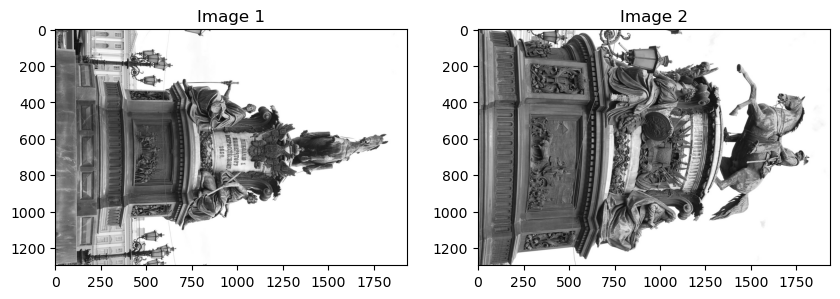

In [3]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title("Image 2")

plt.show()

In [4]:
data = scipy.io.loadmat('A1data/compEx3.mat')
P1 = data['P1']
P2 = data['P2']
U = data['U']

In [5]:
def pflat(x):
    """Normalizes the input matrix by dividing by the last element of each column."""
    return x / x[-1]

def camera_center_and_axis(P):
    # Camera position
    c_pos = pflat(null_space(P))
    c_pos = c_pos[:-1]
    
    # Principle axis
    principal_axis = P[2,:3]
    # norm = sqrt(vx^2 + vy^2 + vz^2)
    norm = np.sqrt(principal_axis[0]**2 + principal_axis[1]**2 + principal_axis[2]**2)
    principal_axis = principal_axis / norm
    
    return c_pos, principal_axis


def plot_camera(C,principal_axis, s=29, ):
    col = (np.random.random(), np.random.random(), np.random.random())
    ax.scatter(C[0],C[1],C[2], color=col, label="Camera center")
    ax.quiver(C[0], C[1], C[2], principal_axis[0], principal_axis[1], principal_axis[2], length=s, arrow_length_ratio=0.05, color=col, label="Principle axis")


Camera center for P1 [[0.]
 [0.]
 [0.]]
Principal axis for P1 [0.31292281 0.94608467 0.08368463]
######################################
Camera center for P2 [[  6.6352039 ]
 [ 14.84597919]
 [-15.06911585]]
Principal axis for P2 [0.03186384 0.34016542 0.93982561]


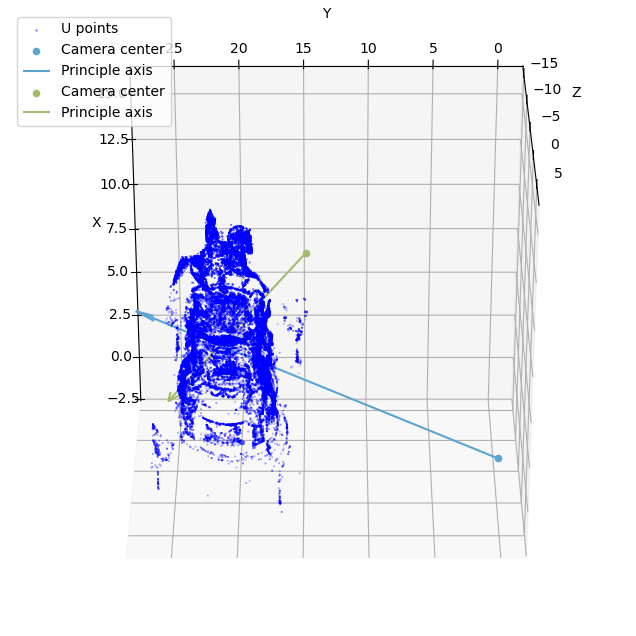

In [6]:
c_pos1, principal_axis1 = camera_center_and_axis(P1)
c_pos2, principal_axis2 = camera_center_and_axis(P2)
print("Camera center for P1", c_pos1)
print("Principal axis for P1", principal_axis1)
print("######################################")
print("Camera center for P2", c_pos2)
print("Principal axis for P2", principal_axis2)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

U_cartesian = pflat(U)[:-1]
ax.scatter(U_cartesian[0], U_cartesian[1],U_cartesian[2],s=0.1, color='blue', label="U points")

plot_camera(c_pos1,principal_axis1)
plot_camera(c_pos2,principal_axis2)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(elev=120, azim=180)
plt.savefig("compEx3_1.png")
plt.legend(loc="upper left")
plt.show()

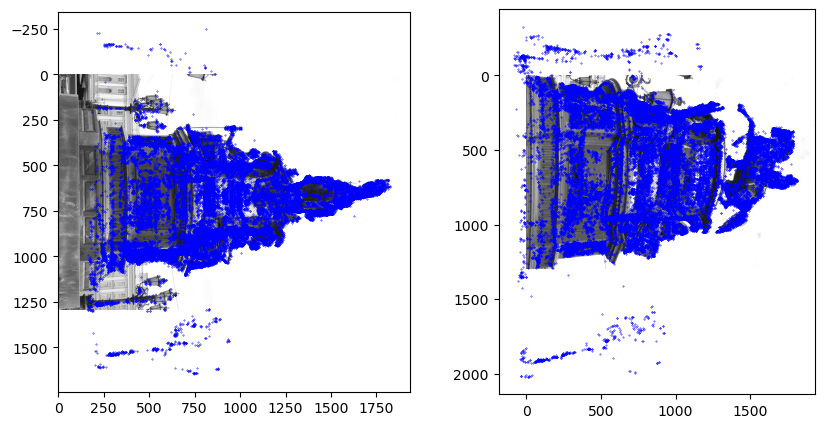

In [7]:
proj1 = pflat(np.matmul(P1,U))
proj2 = pflat(np.matmul(P2,U))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.scatter(proj1[0],proj1[1], color='blue', s=0.1)

plt.subplot(1,2,2)
plt.imshow(image2)
plt.scatter(proj2[0],proj2[1], color='blue', s = 0.1)
plt.savefig("compEx3_2.png")
plt.show()